## PCA

## Task 1: Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 1.Load the dataset and perform basic data exploration.

In [2]:
df=pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# checking for null value
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

## 2.Examine the distribution of features using histograms, box plots, or density plots.

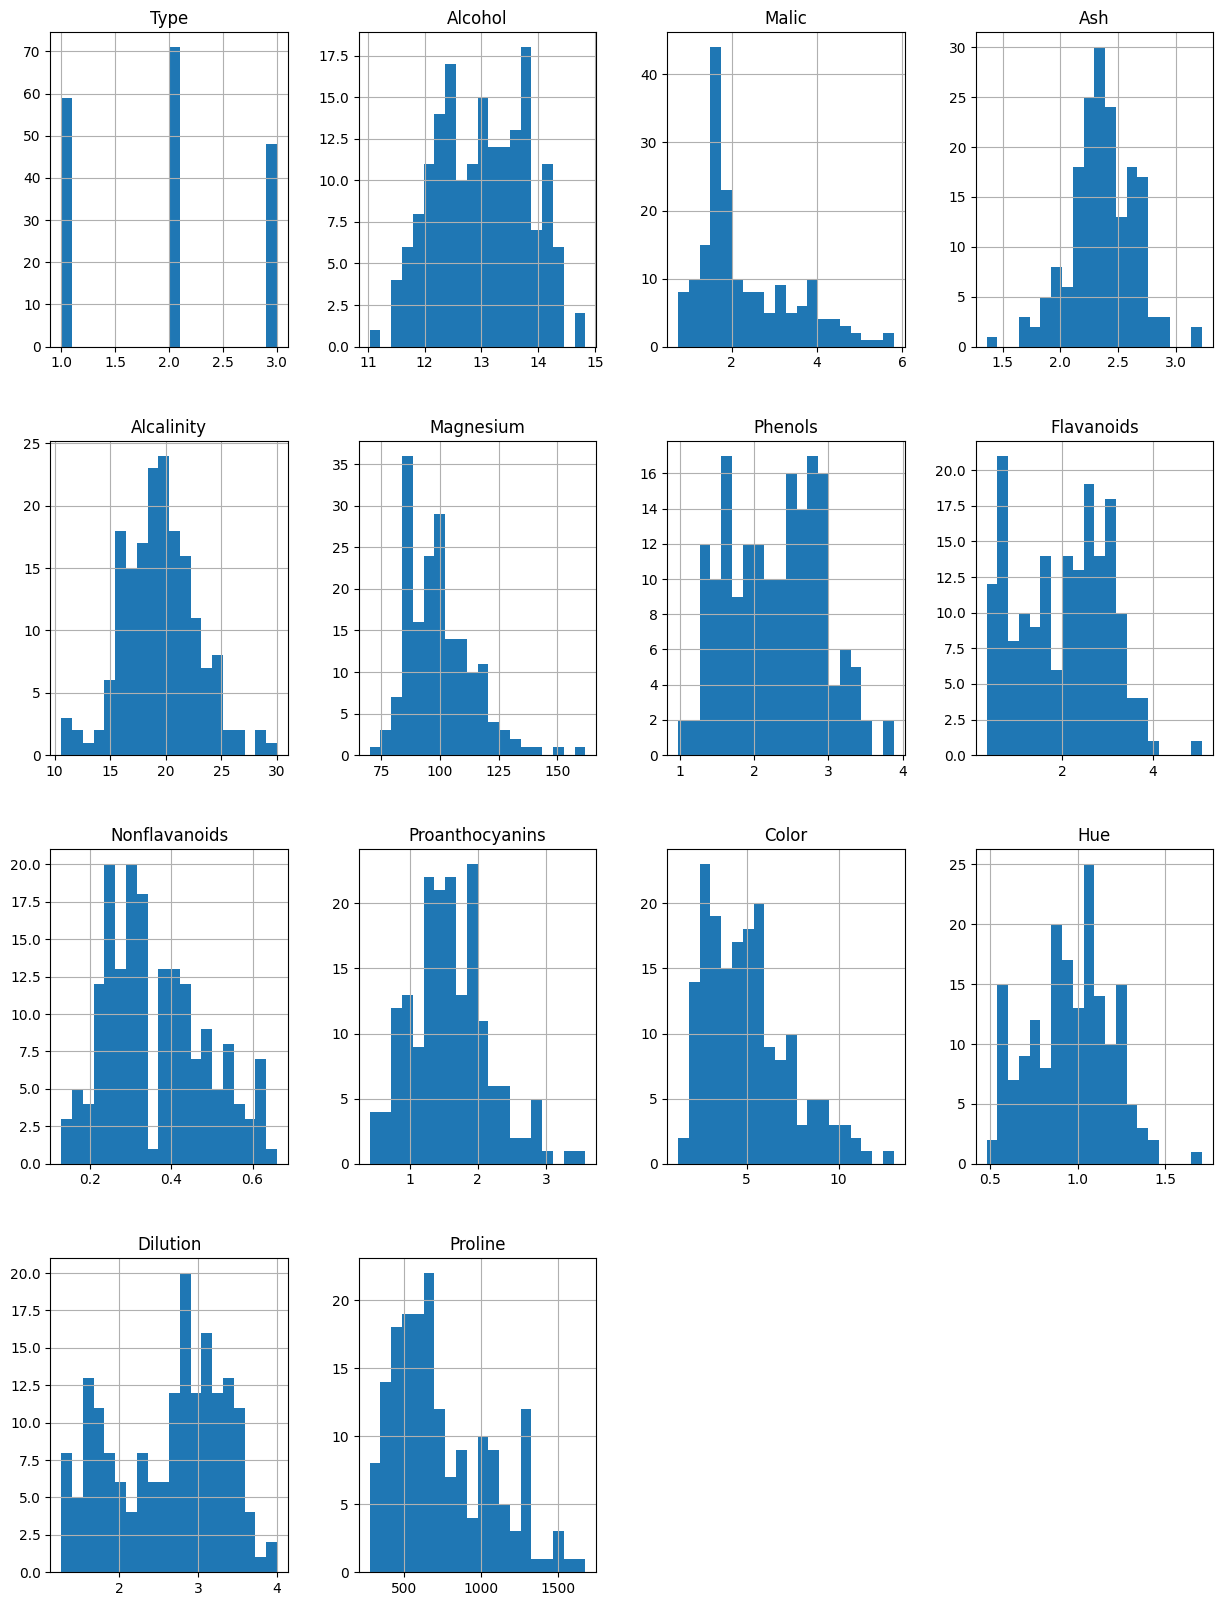

In [6]:
## Ploting Histogram
df.hist(bins=20,figsize=(15,20))
plt.show()

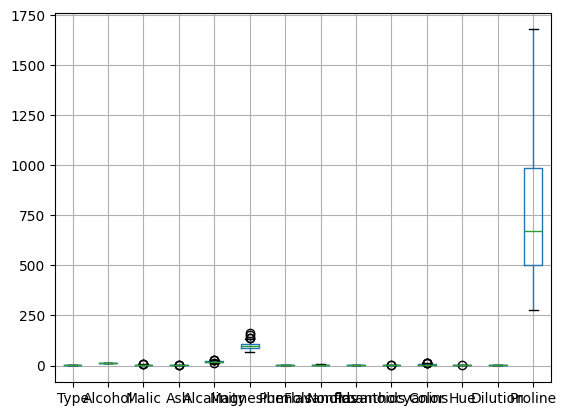

In [7]:
## Ploting Boxplot
df.boxplot()
plt.show()

## 3.Investigate correlations between features to understand relationships within the data.

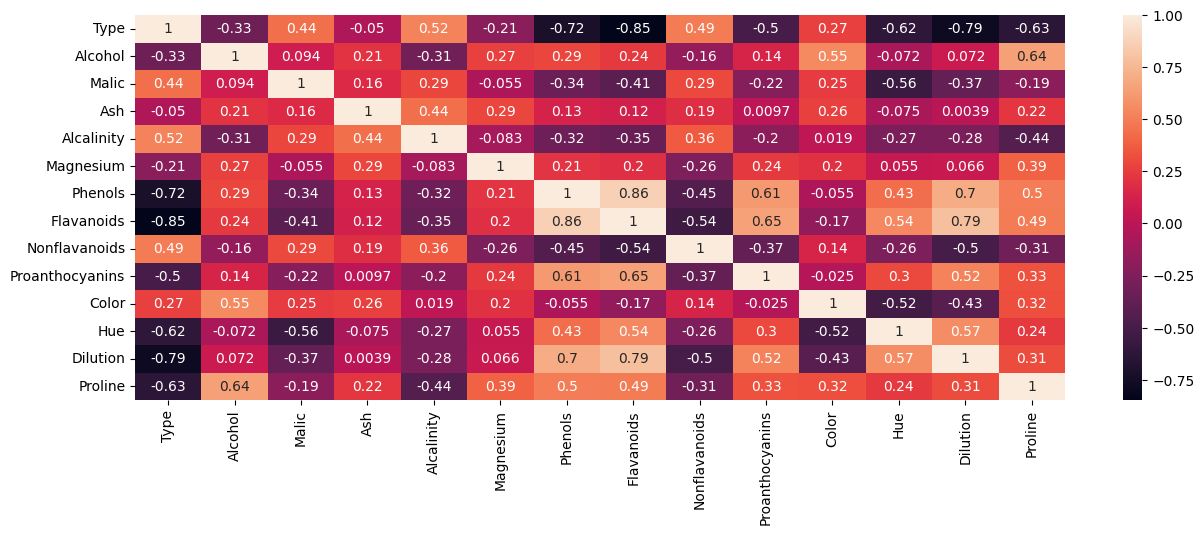

In [8]:
corr=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)
plt.show()

## Task 2: Dimensionality Reduction with PCA:

## 1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


## applying standscaler to standardize the data 
std_sca=StandardScaler()
scaler=std_sca.fit_transform(df)

In [10]:
## implementing PCA
pca=PCA()
pca.fit(scaler)

PCA()

## 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

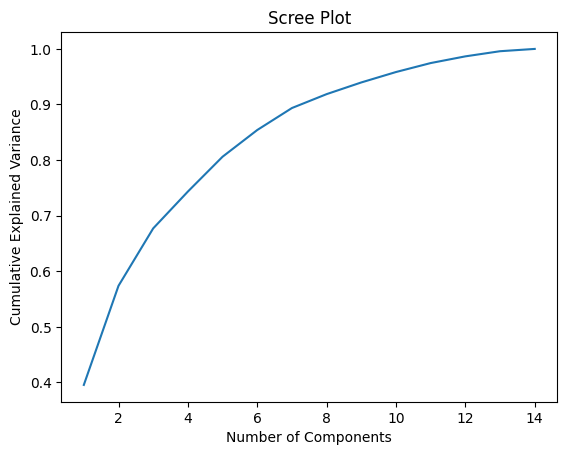

In [11]:
# Scree plot to determine optimal number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

## Transform the original dataset into the principal components

In [12]:
n_components=4
# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaler)
pca_data

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01,
        -1.32728225e-02],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00,
        -4.17144363e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01,
         6.64232412e-01],
       [-3.92258841e+00,  2.76821026e+00, -1.74968168e-01,
         5.65087823e-01],
       [-1.40751111e+00,  8.67773087e-01,  2.02582949e+00,
        -4.40905804e-01],
       [-3.28812981e+00,  2.13017513e+00, -6.28992339e-01,
        -6.05371900e-01],
       [-2.75057754e+00,  1.17916999e+00, -9.77337471e-01,
        -3.53588487e-01],
       [-2.39286652e+00,  1.61128232e+00,  1.45729462e-01,
        -1.24560173e+00],
       [-2.79525633e+00,  9.23179517e-01, -1.77092548e+00,
        -1.56826533e-01],
       [-3.00559666e+00,  7.96284169e-01, -9.83741629e-01,
         2.70293146e-01],
       [-3.67868855e+00,  1.31252342e+00, -4.21854170e-01,
         2.06999612e-03],
       [-2.10963477e+00,  6.12981986e-01, -1.19156995e+00,
      

In [13]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984])

## Task 3: Clustering with Original Data:
## 1.Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [14]:
## aplying k-means

k_means=KMeans(n_clusters=3,random_state=42)
original_clusters=k_means.fit_predict(scaler)
original_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## 2.Visualize the clustering results using appropriate plots.

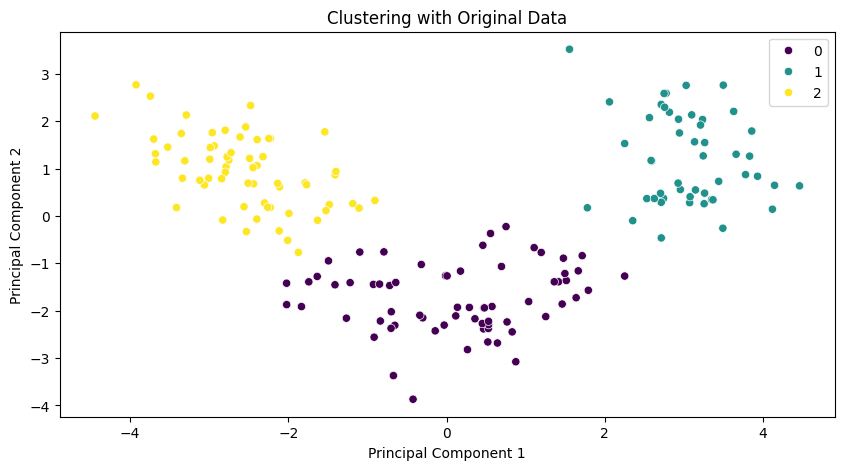

In [15]:
## visualizing the clusters 

plt.figure(figsize=(10,5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
           

## 3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [16]:
## Evaluating clustering performance
silhouette_original = silhouette_score(scaler, original_clusters)
db_index_original = davies_bouldin_score(scaler, original_clusters)
print("Original Data - Silhouette Score:", silhouette_original)
print("Original Data - Davies-Bouldin Index:", db_index_original)

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


## Task 4: Clustering with PCA Data:
## 1.Apply the same clustering algorithm to the PCA-transformed dataset.

In [17]:
## Applying kmeans clustering to pca transformed data

kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

## 2.Visualize the clustering results obtained from PCA-transformed data.

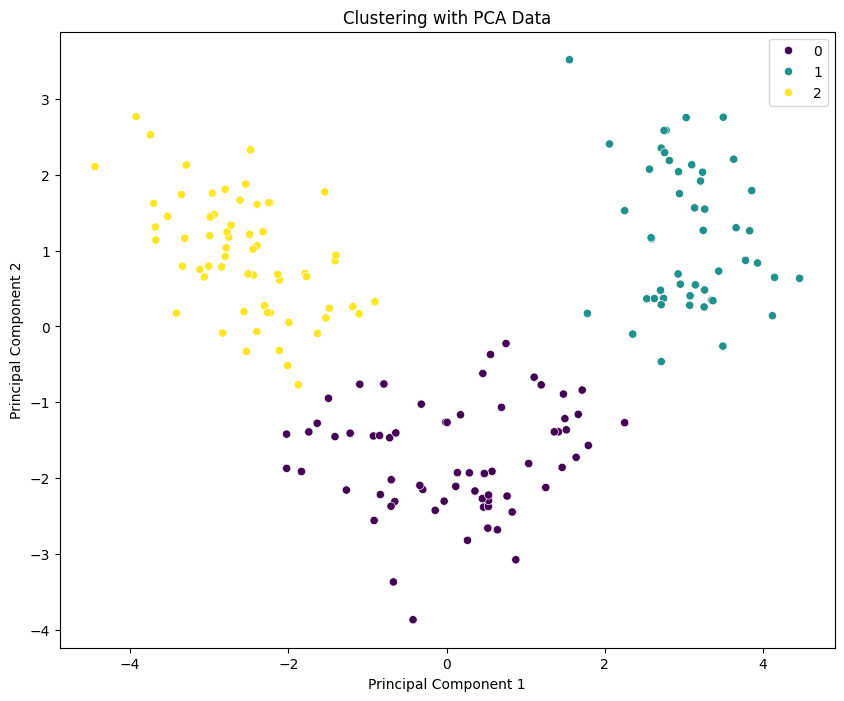

In [18]:
# Visualize the clusters using pairplot or other suitable plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
silhouette_pca=silhouette_score(pca_data, pca_clusters)
print("silhouette_pca:",silhouette_pca)
db_index_pca= davies_bouldin_score(pca_data,pca_clusters)
print("davies_index_pca:",db_index_pca)

silhouette_pca: 0.43678812275959517
davies_index_pca: 0.9186773896497297


## Task 5: Comparison and Analysis:
## 1.Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [20]:
##  Compare clustering results
print("Comparing Clustering Results:")
print("--------------")
print("Silhouette Score - Original Data:", silhouette_original)
print("Davies-Bouldin Index - Original Data:", db_index_original)
print("--------------")
print("Silhouette Score - PCA Data:", silhouette_pca)
print("Davies-Bouldin Index - PCA Data:", db_index_pca)

Comparing Clustering Results:
--------------
Silhouette Score - Original Data: 0.30648398324833453
Davies-Bouldin Index - Original Data: 1.315707552261773
--------------
Silhouette Score - PCA Data: 0.43678812275959517
Davies-Bouldin Index - PCA Data: 0.9186773896497297


## 2.Discuss any similarities or differences observed in the clustering results.

In [21]:
## The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.
## Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.

## 3.Reflect on the impact of dimensionality reduction on clustering performance.

In [22]:
# By projecting the data onto the directions of highest variance, PCA removed noise and redundant information.
# the clusters in the PCA-transformed space became more distinct and visually separable compared to the original high-dimensional space.
# Clustering became more efficient and stable.Visual interpretability increased
# While PCA improved clustering, it also led to some loss of information.If too few components are retained, some subtle but important patterns may be lost.

## 4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [23]:
# PCA removes noise and correlations, which leads to better-separated clusters compared to the original high-dimensional data.
# Clusters formed using PCA components are harder to explain because PCs are combinations of many features, unlike the original dataset.
# Clustering becomes faster and more efficient after PCA because the algorithm works on fewer features.
# Clustering directly on the original dataset preserves all feature details, but may lead to noisy, 
# overlapping clusters due to correlated variables.

## Task 6: Conclusion and Insights

## 1.Summarize the key findings and insights from the assignment.

In [24]:
#Conclusion and Insights:
#In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.
#We compared clustering results from the original data and PCA-transformed data, 
# highlighting the impact of dimensionality reduction on clustering performance.

## 2.Discuss the practical implications of using PCA and clustering in data analysis.

In [25]:
#Practical Implications and Recommendations:
# PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.
# When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.
# However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.
# Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.
# Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, 
# computational resources, and complexity of the data.

## 3.Provide recommendations for when to use each technique based on the analysis conducted.

In [26]:
# Use PCA when the dataset is high-dimensional or highly correlated
# Recommended for business or scientific contexts where feature meaning is important.
# Use PCA when you want faster, stable clustering or clear visualizations
# Use the original dataset when interpretability matters